In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('spam.tsv' , sep='\t')

In [12]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [13]:
df.isna().sum() #checking null values in input data

label      0
message    0
length     0
punct      0
dtype: int64

In [14]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [15]:
df['label'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [16]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [17]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [18]:
ham = ham.sample(spam.shape[0])

In [19]:
data = ham.append(spam , ignore_index=True)

In [20]:
data.shape

(1494, 4)

In [21]:
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

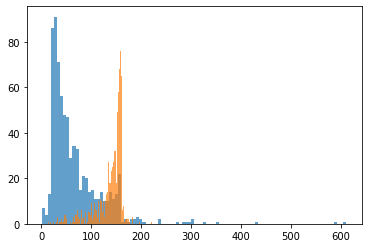

In [22]:
plt.hist(data[data['label'] == 'ham']['length'] , bins = 100 ,alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'] , bins = 100 ,alpha = 0.7)
plt.show()

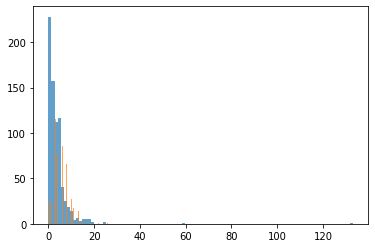

In [23]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [24]:
X_train , X_test , y_train , y_test = train_test_split(data['message'] , data['label'] , test_size=0.3 , random_state=0 , shuffle=True)

In [25]:
X_train.shape , X_test.shape

((1045,), (449,))

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [36]:
classifier = Pipeline([("tfidf" , TfidfVectorizer()), ("classifier" , RandomForestClassifier(n_estimators=100))])

In [37]:
classifier.fit(X_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
y_test , y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
        'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spa

In [29]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

In [40]:
accuracy_score(y_test , y_pred)

0.9465478841870824

In [41]:
confusion_matrix(y_test , y_pred)

array([[225,   2],
       [ 22, 200]])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



Using Support Vector Machine 

In [1]:
from sklearn.svm import SVC

In [4]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [26]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [27]:
y_pred = svm.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.955456570155902
[[223   4]
 [ 16 206]]
              precision    recall  f1-score   support

         ham       0.93      0.98      0.96       227
        spam       0.98      0.93      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [33]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [43]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [35]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
